In [2]:
from __future__ import division,print_function

import os
import sys

from configparser import ConfigParser                  ### For parsing the configuration file
import h5py
import healpy as hp
import pandas as pd
import matplotlib as mpl             ### For plotting options
import matplotlib.pyplot as plt
import numpy as np
import pprint
import time
import pickle
from scipy.interpolate import interp1d

galacticus_folder=os.environ["GALACTICUS_EXEC_PATH"]
DARK_MATTER_DATA_LOCATION=os.environ["DARK_MATTER_DATA_LOCATION"]
DARK_MATTER_PAPER_LOCATION=os.environ["DARK_MATTER_PAPER_LOCATION"]
DARK_MATTER_CODE_LOCATION = os.environ["DARK_MATTER_CODE_LOCATION"]
DARK_MATTER_PLOTS_LOCATION = DARK_MATTER_DATA_LOCATION + "/plots"
sys.path.insert(0, DARK_MATTER_CODE_LOCATION)


import distribution_functions as dist
import model_utils
import sterile_neutrinos as sn
import plot_utils
import strong_lensing_data_processing as sl
import thermal_relic as th
import transfer_functions



## Parsing the posterior from https://arxiv.org/pdf/1908.06983.pdf

Upper 2 sigma upper limit on m is 8.120560280140069
Lower 2 sigma lower limit on m is 4.967783891945973 keV
Upper 2 sigma upper limit on m is 131996442.89082174
Lower 2 sigma lower limit on m is 92850.84053869448 keV


0

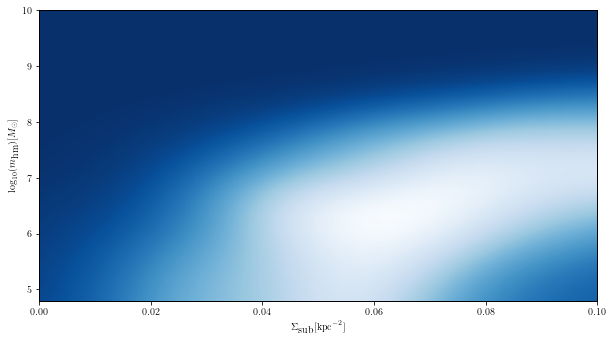

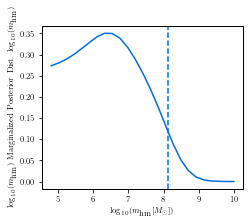

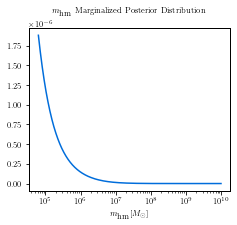

In [3]:

f = sl.load_posterior(paper = "Gilman2020")
#f2 = sl.load_posterior(paper = "Nadler2021")
#l =  sl.sample_the_posterior(f)
log10_m_hm, p_log10_mhm = sl. marginalizing_over_sigma(f)
sl.plot_m_hm_posterior(log10_m_hm,p_log10_mhm)
m_hm, p_m_hm = sl.mhm_log_to_linear(log10_m_hm,p_log10_mhm)
np.argmax(p_m_hm)

In [5]:
 dist.norm_and_limit(log10_m_hm, p_log10_mhm )

Upper 2 sigma upper limit on m is 8.120560280140069
Lower 2 sigma lower limit on m is 4.967783891945973 keV


(4.967783891945973,
 8.120560280140069,
 array([2.73393067e-01, 2.73473464e-01, 2.73553861e-01, ...,
        4.75268955e-05, 4.65124562e-05, 4.54980169e-05]))

In [6]:
 dist.norm_and_limit(m_hm, p_m_hm  )

Upper 2 sigma upper limit on m is 131996442.89082174
Lower 2 sigma lower limit on m is 92850.84053869448 keV


(92850.84053869448,
 131996442.89082174,
 array([1.88177957e-06, 1.87109200e-06, 1.86046498e-06, ...,
        2.08892718e-15, 2.03213159e-15, 1.97593985e-15]))

In [7]:
np.log10(131996442)

8.120562224837727

In [ ]:
m_hm, p_m_hm 

## Calculating Thermal Relic WDM

Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Upper 2 sigma upper limit on m is 37.485294970601466
Lower 2 sigma lower limit on m is 4.22960747691276 keV


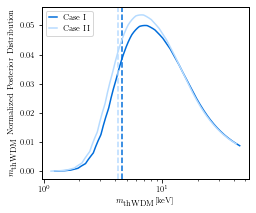

In [3]:

th.m_hm_to_m_thWDM(m_hm=10**8.12,case="no_baryons")
th.plot_thWDM(m_hm,p_m_hm)

## Sterile Neutrino PK and KTY cases

In [1]:
#### Kev 2022 February Transfer functions
t1 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "PK",th_WDM_model_type="viel")
t1.fit_sn_with_WDM(paper_plot=False)
poly_dict_thWDM_to_sn, poly_dict_sn_to_thWDM =t1.fit_polynomials()

#### KTY Transfer functions
t2 = transfer_functions.TransferFunctions(cosmo_constants_type="Planck2018", transfer_function_type = "KTY",th_WDM_model_type="viel")
t2.fit_sn_with_WDM(paper_plot=False)


#### Make the fit tables
transfer_functions.make_table(t1,t2)
### Make the plots of m_sn vs m_thWDM
transfer_functions.plot_sn_vs_wdm_overlay(t1, t2, paper_plot=True)

NameError: name 'transfer_functions' is not defined

Calculating case include_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 163.71016556930448
Lower 2 sigma lower limit on m is 10.128735122781677 keV
Calculating case no_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 37.485294970601466
Lower 2 sigma lower limit on m is 4.22960747691276 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 147.8848167819478
Lower 2 sigma lower limit on m is 9.314297801510957 keV
Calculating case include_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 31.208112842983326
Lower 2 sigma lower limit on m is 1.999483238

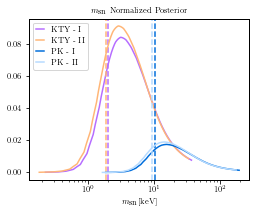

In [5]:
# poly_dict_thWDM_to_sn1, poly_dict_sn_to_thWDM1 =t.fit_polynomials()

# run_sn_all_cases(m_hm,p_m_hm,poly_dict_thWDM_to_sn1)
sn.plot_sn_posteriors(m_hm,p_m_hm,t1,t2)

In [6]:
color_dict =plot_utils.colorblind_color_dict_15()
color_dict

{'cb_black': (0, 0, 0),
 'cb_dark_green': (0, 0.28627450980392155, 0.28627450980392155),
 'cb_blue_green': (0, 0.5725490196078431, 0.5725490196078431),
 'cb_blue': (0, 0.42745098039215684, 0.8588235294117647),
 'cb_medium_blue': (0.42745098039215684, 0.7137254901960784, 1.0),
 'cb_light_blue': (0.7137254901960784, 0.8588235294117647, 1.0),
 'cb_bright_pink': (1.0, 0.42745098039215684, 0.7137254901960784),
 'cb_light_pink': (1.0, 0.7137254901960784, 0.4666666666666667),
 'cb_magenta': (0.7137254901960784, 0.42745098039215684, 1.0),
 'cb_purple': (0.28627450980392155, 0, 0.5725490196078431),
 'cb_red': (0.5725490196078431, 0, 0),
 'cb_brown': (0.5725490196078431, 0.28627450980392155, 0),
 'cb_orange': (0.8588235294117647, 0.8196078431372549, 0),
 'cb_bright_green': (0.1411764705882353, 1.0, 0.1411764705882353),
 'cb_yellow': (1.0, 1.0, 0.42745098039215684)}

### Dodelson Wilson

Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Upper 2 sigma upper limit on m is 598.7405928185603
Lower 2 sigma lower limit on m is 32.64556677385178 keV
Upper 2 sigma upper limit on m is 37.485294970601466
Lower 2 sigma lower limit on m is 4.22960747691276 keV
Upper 2 sigma upper limit on m is 545.3549273421381
Lower 2 sigma lower limit on m is 29.73478148890421 keV


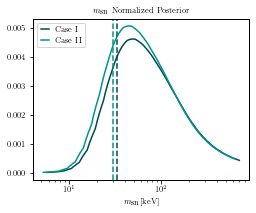

In [7]:
sn.calculate_DW(m_hm,p_m_hm)

Calculating case include_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 163.71016556930448
Lower 2 sigma lower limit on m is 10.128735122781677 keV
Calculating case no_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 37.485294970601466
Lower 2 sigma lower limit on m is 4.22960747691276 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 147.8848167819478
Lower 2 sigma lower limit on m is 9.314297801510957 keV
Calculating case include_baryons
Calculating the thWDM posterior
Upper 2 sigma upper limit on m is 40.205042807694824
Lower 2 sigma lower limit on m is 4.536486902461075 keV
Calculating the sn posterior
Calculate sn for degree  2
Upper 2 sigma upper limit on m is 31.208112842983326
Lower 2 sigma lower limit on m is 1.999483238

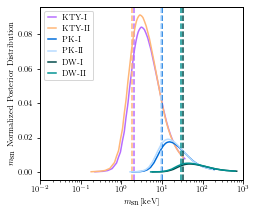

In [8]:


sn.plot_all_sn(m_hm,p_m_hm,t1,t2)

In [9]:
##from Vegetti et al 2018 https://ui.adsabs.harvard.edu/abs/2018MNRAS.481.3661V
#95% upper and lower limits for log(M_hm) M_sun: 9.16, 11.91 
#68%  upper and lower limits for log(M_hm) M_sun: 6.43, 12.01

## Lyman-alpha limit

In [10]:
#These are limits based on the lyman-alpha paper: 

### 3.3 keV constraint from Viel et al. (2013), 5.3 keV constraint from Iršič et al. (2017)
m_thWDM_lalpha_viel = 3.3 #keV
m_thWDM_lalpha_irsic = 5.3 #keV


In [11]:
### Limits on PK and KTY
def lyman_alpha_PK_and_KTY(degree=2):
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    m_snPK_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_viel]), degree)
    m_snPK_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "PK SnDW Ly alpha: Viel", m_snPK_v,"keV, Irsic", m_snPK_i, "keV")
    m_snKTY_v = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_viel]), degree)
    m_snKTY_i = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM_lalpha_irsic]), degree)
    print( "KTY SnDW Ly alpha: Viel", m_snKTY_v,"keV, Irsic", m_snKTY_i, "keV")
    
        
lyman_alpha_PK_and_KTY(degree=2)

PK SnDW Ly alpha: Viel [6.89996021] keV, Irsic [12.19257194] keV
KTY SnDW Ly alpha: Viel [1.31509466] keV, Irsic [2.43306459] keV


In [12]:
### Limits on DW

def get_Omega_DM():
    H_0, Omega_Baryon, Omega_Matter, Omega_Lambda, Omega_Neutrinos, T_cmb, h = model_utils.cosmo_param_Planck_2018()
    Omega_DM = Omega_Matter-Omega_Baryon-Omega_Neutrinos
    return Omega_DM
def lyman_alpa_DW():
    Omega_DM = get_Omega_DM()
    msnDW_v = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_viel, Omega_DM)
    msnDW_i = sn.m_thWDM_to_msnDW(m_thWDM_lalpha_irsic, Omega_DM)
    print("SnDW Ly alpha: Viel", msnDW_v,"keV, Irsic", msnDW_i, "keV")
    return msnDW_v, msnDW_i
lyman_alpa_DW()

SnDW Ly alpha: Viel 21.357471703410006 keV, Irsic 40.169745412075684 keV


(21.357471703410006, 40.169745412075684)

In [13]:
### Limits on nuMSM

def hm_from_thWDM():
    
    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    m_sn_list = []
    p_sn_list = []
    sn_lower_limit_list = []
    
    for case_index in range(len(case_list)):
        case  = case_list[case_index]
        print("Calculating case", case)

        label=label_list[case_index]
        m_hmv = th.m_thWDM_to_m_hm(m_thWDM_lalpha_viel,case)
        m_hmi = th.m_thWDM_to_m_hm(m_thWDM_lalpha_irsic,case)
        print(np.log10(m_hmv))
        print(np.log10(m_hmi))


In [14]:
hm_from_thWDM()

Calculating case include_baryons
8.580784747734
7.895597521756739
Calculating case no_baryons
8.479487492336306
7.794300266359044


## Constraints using Milky Way satellite analysis

In [ ]:

def galaxy_constraints(degree=2):
    m_hm_G = 10**7.0
    
    poly_dict_thWDM_to_snPK, poly_dict_sn_to_thWDM1 =t1.fit_polynomials()
    poly_dict_thWDM_to_snKTY, poly_dict_sn_to_thWDM1 =t2.fit_polynomials()
    
    Omega_DM = get_Omega_DM()

    case_list = ["include_baryons","no_baryons" ]
    label_list= ["Case I","Case II"]
    for i in range(2):
        case= case_list[i]
        m_thWDM = th.m_hm_to_m_thWDM(m_hm_G,case)
        print("Case ",case )
        print("thWDM", m_thWDM)
        m_snPK = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snPK, np.array([m_thWDM]), degree)
        print( "PK SnDW galaxy: ", m_snPK, " keV")
        m_snKTY = sn.m_sn_from_m_thWDM(poly_dict_thWDM_to_snKTY, np.array([m_thWDM]), degree)
        print( "KTY SnDW galaxy:", m_snKTY," keV")
        m_snDW = sn.m_thWDM_to_msnDW(m_thWDM, Omega_DM)
        print( "DW SnDW galaxy:", m_snDW," keV")
   


In [ ]:
galaxy_constraints()